## <p style="text-align: right;"> Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Projections

<img src="https://upload.wikimedia.org/wikipedia/commons/9/98/Projection_and_rejection.png" width="50%">
<p style="text-align: right;">Image from: https://en.wikipedia.org/wiki/Vector_projection</p>

    

### Agenda for today's class (80 minutes)

</p>

1. (20 minutes) Review Pre-class Assignment
1. (30 minutes) Understanding Projections with Code
1. (30 minutes) Gram-Schmidt Orthoganalization Process


---
# 1. Review Pre-class Assignment

[12--Projections-pre-class-assignment](../preclass/12--Projections-pre-class-assignment.ipynb)

# 2. Understanding Projections With Code

In this in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding about what is going on in the math. 
The following code implements some common linear algebra functions:

In [1]:
#Standard Python Libraries only
import math
import copy

In [2]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    temp = 0;
    for i in range(len(u)):
        temp += u[i]*v[i]
    return temp

In [3]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(n)] for j in range(m)]
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result

In [4]:
def add_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]+v2[i])
    return v3

In [5]:
def sub_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]-v2[i])
    return v3

In [6]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

In [7]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

## Projection function

&#9989; <font color=red>**DO THIS:**</font> Write a function that projects vector $v$ onto vector $u$. 
Do not use the numpy library. 
Instead use the functions provided above:

$$\mbox{proj}_u v = \frac{v \cdot u}{u \cdot u} u$$

Make sure this function will work for any size of $v$ and $u$. 

In [109]:
def proj(v,u):
    s = dot(v,u)/dot(u,u)
    pv = [x*s for x in u]
    return pv

Let's test your function. 
Below are two vectors from an example in the book. 
Make sure you get the correct answers. 
You may want to test this code with more than one set of vectors. 

In [110]:
u = [1,2,0,3]
v = [4,0,5,8]
print(proj(u,v))

[1.0666666666666667, 0.0, 1.3333333333333333, 2.1333333333333333]


### Visualizing projections

As a group, see if you can design and implement a small function that takes two vectors ($a$ and $b$) as inputs and generates a figure similar to the one above (at the beginning of the notebook). 
I.e. a black line from the origin to "$b$", a black line from origin to "$a$"; a green line showing the "$a$" component in the "$b$" direction and a red line showing the "$a$" component orthogonal to the green line. 
Also see section titled "Projection of One Vector onto Another Vector" in Section 4.6 on page 258 of the book.

When complete, show your solution to the instructor.

In [111]:
%matplotlib inline
import matplotlib.pylab as plt

In [112]:
def p(a,b):
    ax = plt.axes();
    
    plt.plot(0,0)
    plt.plot(5,5)
    
    plt.plot([0,b[0]],[0,b[1]],color='black');
    plt.plot([0,a[0]],[0,a[1]],color='black'); 
    
    a1 = proj(a,b)
    plt.plot([0,a1[0]],[0,a1[1]],color='green'); 

    a2 = sub_vectors(a,a1)
    
    plt.plot([a1[0],a1[0]+a2[0]],[a1[1],a1[1]+a2[1]],color='red'); 
    
    print(a1)
    


[2.769230769230769, 1.8461538461538463]


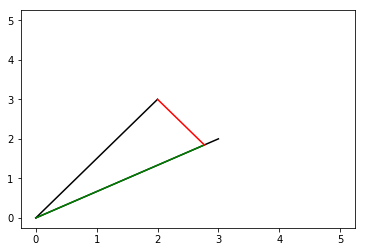

In [113]:
p([2,3],[3,2])

# 3. Gram-Schmidt Orthoganalization Process

&#9989; <font color=red>**DO THIS:**</font> Implement the Gram-Schmidt orthoganalization process from the textbook (page 259). 
This function takes a $m \times n$ Matrix $A$ with linearly independent columns as input and return a $m \times n$ Matrix $G$ with orthogonal column vectors. 
The basic algorithm works as follows:

- ```AT = transpose(A)``` (this process works with the columns of the matrix so it is easier to work with the transpose. Think about a list of list, it is easy to get a row (a list)).  
- Make a new empty list of the same size as ```AT``` and call it ```GT``` (G transpose)
- Loop index ```i``` over all of the rows in AT (i.e. columns of A) 

    - ```GT[i] = AT[i]```
    - Loop index ```j``` from 0 to ```i```
        - ```GT[i] -= proj(AT[i],GT[j])```
        
        
- ```G = transpose(GT)```

Use the following function definition as a template:

In [120]:
def GramSchmidt(A):
    AT = transpose(A)
    GT = [[0 for e in l] for l in AT]
    print(len(GT))
    for i in range(len(GT)):
        GT[i] = AT[i]
        for j in range(i):
            GT[i] = sub_vectors(GT[i],proj(AT[i],GT[j]))
    G = transpose(GT)
    return G

Here, we are going to test your function using the vectors shown in Example 4 (page 260) of the textbook:

In [126]:
A4 = [[1,4,8],[2,0,1],[0,5,5],[3,8,6]]
print(transpose(A4))
G4 = GramSchmidt(A4)
print(transpose(G4))

[[1, 2, 0, 3], [4, 0, 5, 8], [8, 1, 5, 6]]
3
[[1, 2, 0, 3], [2.0, -4.0, 5.0, 2.0], [4.0, 1.0, 0.0, -2.0]]


In [127]:
A2 = [[-4,-6],[3,5]]
print(transpose(A2))
G2 = GramSchmidt(A2)
print(transpose(G2))

[[-4, 3], [-6, 5]]
2
[[-4, 3], [0.2400000000000002, 0.3200000000000003]]


&#9989; <font color=red>**QUESTION:**</font> What is the Big-O complexity of the Gram-Schmidt process? 

O(n^3)

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees